#  <span style="color:black">Проект E-Commerce</span>
***
**Цель исследования**  
Ответить на следующие вопросы:
* Сколько у нас пользователей, которые совершили покупку только один раз?
* Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
* По каждому товару определить, в какой день недели товар чаще всего покупается.
* Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.
* Выполните когортный анализ пользователей, в ходе анализа выявить когорту с самым высоким Retention на 3-й месяц в периоде с января по декабрь 2017 года
* Провести RFM-анализ пользователей

**Контекст исследования**  
Компании нужно проанализировать данные о покупках пользователей, чтобы понять их поведение и улучшить стратегию продаж.

**План исследования**  
1. Знакомство с данными и предобработка данных
3. Получение ответов на поставленные вопросы
4. Результаты исследования

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#импорт библиотек

In [2]:
df_customers = pd.read_csv('olist_customers_dataset.csv') # данные о пользователях

In [3]:
df_customers.query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
df_items = pd.read_csv('olist_order_items_dataset.csv') # данные о товарах

In [6]:
df_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
df_items['shipping_limit_date'] = df_items['shipping_limit_date'].astype('datetime64')
#преобразование столбца с данными в нужный тип

In [8]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [9]:
df_orders = pd.read_csv('olist_orders_dataset.csv') #данные о заказах на маркете

In [10]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
df_orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].astype('datetime64')
#преобразование дат в нужный формат

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [14]:
df_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

## Предварительный анализ данных. Информация
***  
<span style="color:green">olist_customers_datase.csv</span> — таблица с уникальными идентификаторами пользователей 

* **customer_id** — позаказный идентификатор пользователя

* **customer_unique_id** —  уникальный идентификатор пользователя  (аналог номера паспорта)

* **customer_zip_code_prefix** —  почтовый индекс пользователя

* **customer_city** —  город доставки пользователя

* **customer_state** —  штат доставки пользователя
***  
<span style="color:green">olist_orders_dataset.csv</span> —  таблица заказов

* **order_id** —  уникальный идентификатор заказа (номер чека)

* **customer_id** —  позаказный идентификатор пользователя

* **order_status** —  статус заказа

* **order_purchase_timestamp** —  время создания заказа

* **order_approved_at** —  время подтверждения оплаты заказа

* **order_delivered_carrier_date** —  время передачи заказа в логистическую службу

* **order_delivered_customer_date** —  время доставки заказа

* **order_estimated_delivery_date** —  обещанная дата доставки

**Уникальные статусы заказа в order_status:**
* *created* —  создан
* *approved* —  подтверждён
* *invoiced* —  выставлен счёт
* *processing* —  в процессе сборки заказа
* *shipped* —  отгружен со склада
* *delivered* —  доставлен пользователю
* *unavailable* —  недоступен
* *canceled* —  отменён
***

<span style="color:green">olist_order_items_dataset.csv</span> — товарные позиции, входящие в заказы

* **order_id** —  уникальный идентификатор заказа (номер чека)

* **order_item_id** —  идентификатор товара внутри одного заказа

* **product_id** —  ид товара (аналог штрихкода)

* **seller_id** — ид производителя товара

* **shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

* **price** —  цена за единицу товара

* **freight_value** —  вес товара


> **Покупкой будем считать заказ со статусом <span style="color:blue">delivered</span>, это будет означать, что клиент оплатил покупку и получил её**

### Cколько пользователей, которые совершили всего одну покупку?

In [15]:
onebuy = df_customers[['customer_id', 'customer_unique_id']]

onebuy_merger = df_orders[['customer_id', 'order_id', 'order_status']]

onebuy_final= onebuy.merge(onebuy_merger, on='customer_id')

onebuy_final = onebuy_final.query('order_status == "delivered"').groupby('customer_unique_id', as_index=False).agg({'order_id':'count'}) \
.query('order_id == 1')

In [16]:
print(f"Количество пользователей, совершивших одну покупку: {len(onebuy_final)}")

Количество пользователей, совершивших одну покупку: 90557


### Сколько заказов в месяц не доставляется по разным причинам?


In [17]:
bad_orders = df_orders[['order_id', 'order_status', 'order_purchase_timestamp']] \
.query('order_status == "unavailable" or order_status == "canceled"') #создадим df для работы с плохими заказами

In [18]:
bad_orders['month_year'] = bad_orders.order_purchase_timestamp.astype('datetime64[M]')
bad_orders.head(5)

,order_id,order_status,order_purchase_timestamp,month_year
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-01
397,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27,2018-08-01
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-01
613,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08,2018-01-01
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-01


In [19]:
plot_orders = bad_orders.groupby(['month_year', 'order_status'], as_index=False).agg({'order_id':'count'}).sort_values('month_year') \
.rename(columns=({'order_id':'count'}))
plot_orders.head()

,month_year,order_status,count
0,2016-09-01,canceled,2
1,2016-10-01,canceled,24
2,2016-10-01,unavailable,7
3,2017-01-01,canceled,3
4,2017-01-01,unavailable,10


Text(0.5, 1.0, 'Число не доставленных заказов')

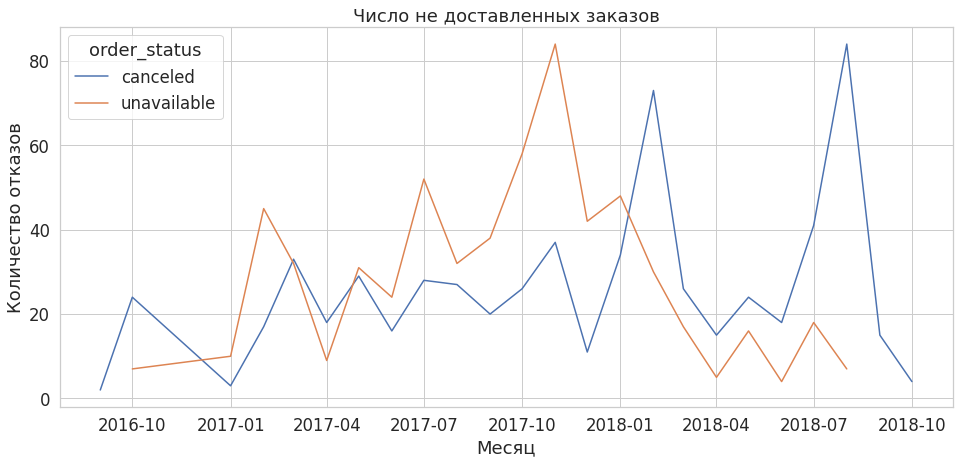

In [20]:

sns.set(font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(16,7)})
ax = sns.lineplot(data=plot_orders, x='month_year', y='count', hue='order_status', palette="deep", ci=None)

plt.xlabel('Месяц')
plt.ylabel('Количество отказов')
plt.title('Число не доставленных заказов')



In [21]:
bad_orders.groupby(['month_year'], as_index=False) \
.agg({'order_id':'count'}).rename(columns=({'order_id':'count'})).mean(numeric_only=True).to_string()

'count    51.416667'

### В среднем в месяц не доставляется 51 заказ.
***
> На графике видно, что количество отказов от заказа выросло в несколько раз в январе 2018 года, а также в августе 2018 года, возможно на то время были причины, конкуренты предложили более качественный товар или другие внешние причины.  
Также видно, что количество заказов со статусом "Недоступен" имеет тенденцию к снижению.

## По каждому товару определить, в какой день недели товар чаще всего покупается.


>Для будущей проверки узнаем уникальное количество товаров, которые фигурируют в датафрейме.

In [22]:
print(f"Количество уникальных товаров: {df_items.product_id.nunique()}")

Количество уникальных товаров: 32951


In [23]:
checks = df_items[['order_id', 'product_id']]
checks.head(5)

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089


In [24]:
checks_merger = df_orders[['order_id', 'order_status', 'order_purchase_timestamp']]
checks_merger['weekday'] = checks_merger.order_purchase_timestamp.dt.weekday

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
checks = checks.merge(checks_merger, on='order_id')
checks.head(5)

,order_id,product_id,order_status,order_purchase_timestamp,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,delivered,2017-09-13 08:59:02,2
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,delivered,2017-04-26 10:53:06,2
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,delivered,2018-01-14 14:33:31,6
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,delivered,2018-08-08 10:00:35,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,delivered,2017-02-04 13:57:51,5


In [26]:
final_top_day = checks.replace({0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'}) \
.groupby(['product_id', 'weekday'], as_index=False) \
.agg({'order_status':'count'}) \
.rename(columns=({'order_status': 'count'})) \
.groupby('product_id').max() \
.sort_values('count', ascending=False)
final_top_day.head(5)

,weekday,count
product_id,,
422879e10f46682990de24d770e7f83d,Четверг,93
99a4788cb24856965c36a24e339b6058,Четверг,92
aca2eb7d00ea1a7b8ebd4e68314663af,Четверг,89
53b36df67ebb7c41585e8d54d6772e08,Четверг,76
368c6c730842d78016ad823897a372db,Четверг,67


In [27]:
#выполняем проверку
print(f"Количество товаров одинаково? {df_items.product_id.nunique() == len(final_top_day)}")

Количество товаров одинаково? True


***
## Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. 

In [28]:
# Найдём уникальных пользователей
unique_customers = df_customers[['customer_unique_id', 'customer_id']] 
#вытащим данные об успешных покупках
week_purchases = df_orders.query('order_status == "delivered"')[['customer_id', 'order_id', 'order_purchase_timestamp']]

#соединяем данные о покупках с уникальным id пользователя
week_purchases= week_purchases.merge(unique_customers, on='customer_id')

#удаляем ненужный столбец
week_purchases = week_purchases.drop('customer_id', axis=1)
week_purchases.head(5)

,order_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6


In [29]:
#учитываем год и месяц в датафрейме
week_purchases['year_month'] = week_purchases['order_purchase_timestamp'].dt.to_period("M")

#учитываем нечёткое количество недель
week_purchases['weeks_month'] = (week_purchases['year_month'].dt.days_in_month / 7).round(2)
week_purchases.head(5)

,order_id,order_purchase_timestamp,customer_unique_id,year_month,weeks_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,4.00


In [30]:
#считаем количество заказов для каждого пользователя
week_purchases = week_purchases.groupby(['customer_unique_id', 'year_month', 'weeks_month'], as_index=False).agg({'order_id':'count'}) \
.rename(columns={'order_id': 'purchase_count'})

#считаем среднее количество покупок в неделю
week_purchases['avg_week_purchase'] = (week_purchases.purchase_count / week_purchases.weeks_month).round(2)
week_purchases.head(5)

,customer_unique_id,year_month,weeks_month,purchase_count,avg_week_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.23


In [31]:
#в среднем покупок в неделю с разбивкой по месяцам
week_purchases_month = week_purchases.groupby(['customer_unique_id', 'year_month']) \
.agg({'avg_week_purchase':'mean'}).sort_values('year_month')

# в среднем покупок в неделю за всё время наблюдений
avg_purchases_no_month = week_purchases \
    .groupby('customer_unique_id') \
    .agg({'avg_week_purchase': 'mean'}).sort_values('avg_week_purchase', ascending=False)

print('В среднем покупок в неделю с разбивкой по месяцам')
display(week_purchases_month.head(5))

print('В среднем покупок в неделю за всё время наблюдений')
display(avg_purchases_no_month.head(5))

В среднем покупок в неделю с разбивкой по месяцам


,,avg_week_purchase
customer_unique_id,year_month,
830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,0.23
11a40baf46bd96289d1f0936dae9a256,2016-10,0.23
fb48b86d9a78b53675c121e4ec8981ed,2016-10,0.23
517a3d8518447c776efd430b66470e27,2016-10,0.23
3e36312a56bdb312242490706752940b,2016-10,0.23


В среднем покупок в неделю за всё время наблюдений


,avg_week_purchase
customer_unique_id,
12f5d6e1cbf93dafd9dcc19095df0b3d,1.35
a239b8e2fbce33780f1f1912e2ee5275,1.00
25a560b9a6006157838aab1bdbd68624,0.93
b08fab27d47a1eb6deda07bfd965ad43,0.93
83e7958a94bd7f74a9414d8782f87628,0.90


In [32]:
avg_purchases_no_month.median()

avg_week_purchase    0.23
dtype: float64

## Посчитать метрики среднего LTV, MAU и Churn Rate
> Для подсчёта LTV воспользуемся формулой LTV = lifetime * ARPPU

In [33]:
LTV = df_orders.query('order_status == "delivered"')[['order_id', 'customer_id', 'order_purchase_timestamp']]
#берём данные с 1 января 2017 года по 1 января 2018 года
LTV = LTV[(LTV['order_purchase_timestamp'] > '2017-01-01') & (LTV['order_purchase_timestamp'] < '2018-01-01')] 
#используем уникальных пользователей
LTV = LTV.merge(unique_customers, on='customer_id') 
LTV = LTV.drop('customer_id', axis=1)


order_price = df_items[['order_id', 'price']]

#присоединяем цену к нашему датафрейму
LTV= LTV.merge(order_price, on='order_id')


In [34]:

final_LTV = LTV.groupby('customer_unique_id').agg({'order_purchase_timestamp':['min', 'max']})

final_LTV['lifetime'] = final_LTV[('order_purchase_timestamp', 'max')] - final_LTV[('order_purchase_timestamp', 'min')]
final_LTV['lifetime'] = final_LTV['lifetime'].dt.days

final_LTV.columns = final_LTV.columns.to_flat_index()

final_LTV = final_LTV \
.rename(columns=({('order_purchase_timestamp', 'min'): 'min_date', ('order_purchase_timestamp', 'max'):'last_date', ('lifetime', ''):'lifetime'})) \
.reset_index()

In [35]:
print(f"Годовой LTV: {round(LTV.price.mean() / final_LTV.lifetime.mean(), 2)}") 
#используем для подсчёта ARPPU функцию среднего, ибо данные в таблицах представлены только о совершившихся покупках

Годовой LTV: 96.28


### MAU
> Количество активных пользователей месяц.  
Будем считать пользователя **активным**, если он совершил покупку в рассматриваемый период

In [36]:
MAU = df_orders.query('order_status == "delivered"')[['order_id', 'customer_id', 'order_purchase_timestamp']]
#берём данные с 1 января 2017 года по 1 января 2018 года
MAU = MAU[(MAU['order_purchase_timestamp'] >= '2017-01-01') & (MAU['order_purchase_timestamp'] <= '2018-01-01')] 
#используем уникальных пользователей
MAU = MAU.merge(unique_customers, on='customer_id') 
MAU = MAU.drop('customer_id', axis=1)

In [37]:
MAU.order_purchase_timestamp = MAU.order_purchase_timestamp.dt.to_period("M")
MAU_vis = MAU.groupby('order_purchase_timestamp', as_index=False).agg({'customer_unique_id':pd.Series.nunique}) \
.rename(columns=({'order_purchase_timestamp':'Month', 'customer_unique_id':'user_count'}))
MAU_vis['Month'] = MAU_vis['Month'].astype('str')
print(f"Средний MAU в 2017 году составляет:{round(MAU_vis.user_count.mean(), 0)}")

Средний MAU в 2017 году составляет:3561.0


Text(0, 0.5, 'Количество активных пользователей')

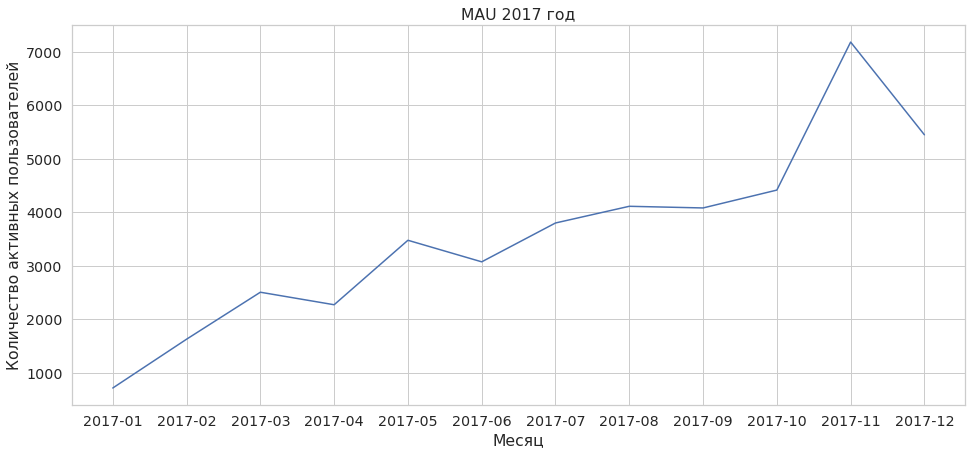

In [38]:
sns.set(font_scale=1.3,
    style="whitegrid",
    rc={'figure.figsize':(16,7)})
sns.lineplot(data=MAU_vis, x='Month', y='user_count', palette="deep", ci=None)
plt.title('MAU 2017 год')
plt.xlabel('Месяц')
plt.ylabel('Количество активных пользователей')


## Churn rate

In [39]:
churn = df_orders.query('order_status == "delivered"')[['order_id', 'customer_id', 'order_purchase_timestamp']]
#берём данные с 1 января 2017 года по 1 января 2018 года
churn = churn[(churn['order_purchase_timestamp'] > '2017-01-01') & (churn['order_purchase_timestamp'] < '2018-01-01')] 
#используем уникальных пользователей
churn = churn.merge(unique_customers, on='customer_id') 
churn = churn.drop('customer_id', axis=1)
churn['order_purchase_timestamp'] = churn.order_purchase_timestamp.to_numpy().astype('datetime64[M]')

In [40]:
churn.head(5)

,order_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-01,7c396fd4830fd04220f754e42b4e5bff
1,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-01,7c142cf63193a1473d2e66489a9ae977
2,a4591c265e18cb1dcee52889e2d8acc3,2017-07-01,80bb27c7c16e8f973207a5086ab329e2
3,6514b8ad8028c9f2cc2374ded245783f,2017-05-01,932afa1e708222e5821dac9cd5db4cae
4,76c6e866289321a7c93b82b54852dc33,2017-01-01,39382392765b6dc74812866ee5ee92a7


In [41]:
churn_grouped = churn.groupby(['order_purchase_timestamp', 'customer_unique_id'])\
                       .agg({'order_id' : 'count'})\
                       .reset_index()

churn_grouped.columns = ['purchase_date', 'id', 'purchase_count']

In [42]:
churn_grouped.head(5)

,purchase_date,id,purchase_count
0,2017-01-01,00115fc7123b5310cf6d3a3aa932699e,1
1,2017-01-01,008f3d5f45a11059239a5c452cd00006,1
2,2017-01-01,012e12f54f6e73b1faba89a119dab849,1
3,2017-01-01,01838e7d69d87bd8ff2b6ff06789adfb,1
4,2017-01-01,02251550f4d16aca44ce66e4263c0522,1


In [43]:
churn_grouped['next_purchase_date'] = churn_grouped.groupby('id')['purchase_date'].shift(-1)

churn_grouped['days_till_next_purchase'] = (churn_grouped['next_purchase_date'] - churn_grouped['purchase_date']).dt.days / 30.4

In [44]:
churn_grouped['is_churned_int'] = churn_grouped.days_till_next_purchase.apply(lambda x: 0 if x < 4 else 1)

In [45]:
churn_grouped.head(5)

,purchase_date,id,purchase_count,next_purchase_date,days_till_next_purchase,is_churned_int
0,2017-01-01,00115fc7123b5310cf6d3a3aa932699e,1,NaT,NaN,1
1,2017-01-01,008f3d5f45a11059239a5c452cd00006,1,NaT,NaN,1
2,2017-01-01,012e12f54f6e73b1faba89a119dab849,1,NaT,NaN,1
3,2017-01-01,01838e7d69d87bd8ff2b6ff06789adfb,1,NaT,NaN,1
4,2017-01-01,02251550f4d16aca44ce66e4263c0522,1,NaT,NaN,1


In [46]:
max_relevant_date = churn_grouped.purchase_date.max() - dt.timedelta(days=30)

churn_rate = churn_grouped.query('purchase_date <= @max_relevant_date')\
                           .groupby(['purchase_date'])\
                           .agg({'is_churned_int' : 'sum', 'id' : pd.Series.nunique})

churn_rate.columns = ['churned', 'dau']

# расчитываем метрику
churn_rate['churn_rate'] = round(churn_rate['churned'] / churn_rate['dau'], 3)
# переводим ее в проценты
churn_rate['churn_rate_perc'] = churn_rate['churn_rate'] * 100

In [47]:
churn_rate = churn_rate.reset_index()

In [48]:
churn_rate['purchase_date'] = churn_rate['purchase_date'].astype('str')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

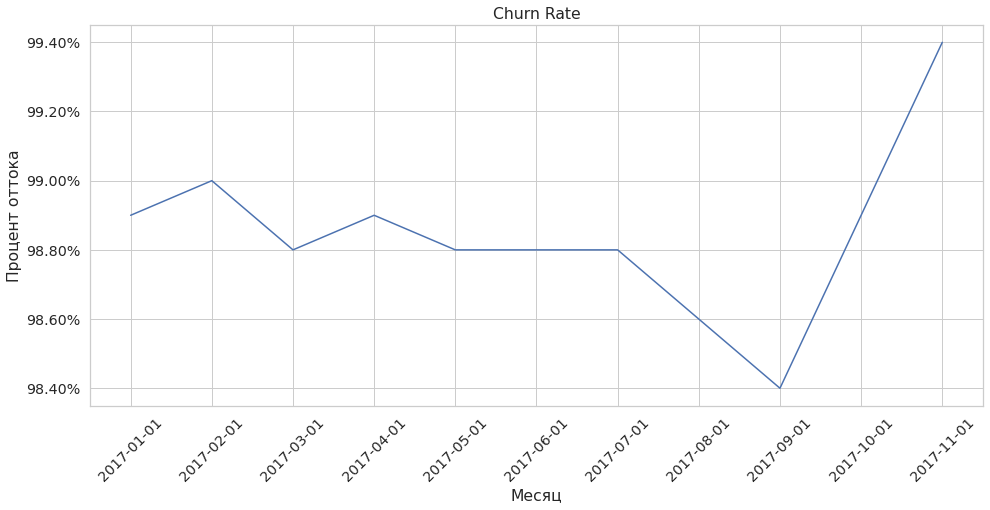

In [49]:
sns.set(font_scale=1.3,
    style="whitegrid",
    rc={'figure.figsize':(16,7)})
ax = sns.lineplot(data=churn_rate, y='churn_rate_perc', x='purchase_date')
plt.title('Churn Rate')
plt.xlabel('Месяц')
plt.ylabel('Процент оттока')

ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.xticks(rotation=45)


### Когортный анализ
* Выполните когортный анализ пользователей, в ходе анализа выявить когорту с самым высоким Retention на 3-й месяц в периоде с января по декабрь 2017 года

In [50]:
cohort_an = df_orders.query('order_status == "delivered"')[['order_id', 'customer_id', 'order_purchase_timestamp']]

#используем уникальных пользователей из прошлой задачи
cohort_an = cohort_an.merge(unique_customers, on='customer_id') 
cohort_an = cohort_an.drop('customer_id', axis=1)
cohort_an.head(5)

,order_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6


In [51]:
#цена заказа
order_price = df_items[['order_id', 'price']]

#присоединяем цену к нашему датафрейму
cohort_an= cohort_an.merge(order_price, on='order_id')

print(f"Количество дубликатов: {len(cohort_an)- len(cohort_an.drop_duplicates())}") 
cohort_an = cohort_an.drop_duplicates() 
print(f"Количество дубликатов после преобразования: {len(cohort_an)- len(cohort_an.drop_duplicates())}") 

Количество дубликатов: 11140
Количество дубликатов после преобразования: 0


In [52]:
print(f"Количество заказов совершенных за время наблюдений: {cohort_an.order_id.count()}")

print(f"Выручка за время наблюдений: {round(cohort_an.price.sum())}") 

Количество заказов совершенных за время наблюдений: 99057
Выручка за время наблюдений: 12325186


In [53]:
#Найдём месяц первого заказа для каждого пользователя, обозначим её как когорту
first_orders = cohort_an.groupby('customer_unique_id').agg({'order_purchase_timestamp': 'min'}).reset_index() \
.rename(columns=({'order_purchase_timestamp':'first_order'}))

first_orders['first_order'] = first_orders.first_order.dt.date



In [54]:
first_orders

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02


In [55]:
#Присоединяем дату первой покупки для каждого пользователя и обозначим её, как когорту
cohort_an = cohort_an.merge(first_orders, on='customer_unique_id')
cohort_an['first_order'] = cohort_an.first_order.apply(lambda x: x.strftime('%Y-%m'))
cohort_an= cohort_an.rename(columns=({'first_order':'cohort_group'}))

# Обозначим для каждой покупки период, в который она совершена
cohort_an['OrderPeriod'] = cohort_an.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))

In [56]:
# Обозначим для каждой покупки период, в который она совершена
cohort_an['OrderPeriod'] = cohort_an.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))

In [57]:
cohort_an.head(5)

,order_id,order_purchase_timestamp,customer_unique_id,price,cohort_group,OrderPeriod
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99,2017-09,2017-10
1,69923a4e07ce446644394df37a710286,2017-09-04 11:26:38,7c396fd4830fd04220f754e42b4e5bff,35.39,2017-09,2017-09
2,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,118.70,2018-07,2018-07
3,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,159.90,2018-08,2018-08
4,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00,2017-11,2017-11


In [58]:
grouped = cohort_an.query('order_purchase_timestamp >= "2017-01" & order_purchase_timestamp <= "2017-12"') \
.groupby(['cohort_group', 'OrderPeriod'])

cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique,
                       'price': 'sum'})

cohorts.rename(columns={'customer_unique_id': 'TotalUsers',
                        'order_id': 'TotalOrders'}, inplace=True)

In [59]:
cohorts

TotalUsers  TotalOrders      price
cohort_group OrderPeriod                                    
2016-10      2017-04               1            1      99.99
             2017-07               1            1     339.00
             2017-09               1            1      49.00
             2017-11               1            1      38.40
2016-12      2017-01               1            1      10.90
...                              ...          ...        ...
2017-09      2017-10              28           28    2859.01
             2017-11              22           22    2733.74
2017-10      2017-10            4328         4384  589180.00
             2017-11              31           33    3307.96
2017-11      2017-11            7060         7160  893745.57

[70 rows x 3 columns]

In [60]:
def cohort_period(cohorts):
    cohorts['CohortPeriod'] = cohorts.groupby(level=0).cumcount()
     
    return cohorts

In [61]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)


In [62]:
cohorts.groupby(level=0).apply(cohort_period)

TotalUsers  TotalOrders      price  CohortPeriod
cohort_group OrderPeriod                                                  
2016-10      2017-04               1            1      99.99             0
             2017-07               1            1     339.00             1
             2017-09               1            1      49.00             2
             2017-11               1            1      38.40             3
2016-12      2017-01               1            1      10.90             0
...                              ...          ...        ...           ...
2017-09      2017-10              28           28    2859.01             1
             2017-11              22           22    2733.74             2
2017-10      2017-10            4328         4384  589180.00             0
             2017-11              31           33    3307.96             1
2017-11      2017-11            7060         7160  893745.57             0

[70 rows x 4 columns]

In [63]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'CohortPeriod'], inplace=True)


cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

cohort_group
2016-10       1
2016-12       1
2017-01     717
2017-02    1628
2017-03    2503
Name: TotalUsers, dtype: int64

In [64]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

cohort_group,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
CohortPeriod,,,,,,,,,,,,,
0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,1.0,NaN,0.002789,0.001843,0.004395,0.006206,0.004636,0.004939,0.005330,0.006902,0.006993,0.007163,NaN
2,1.0,NaN,0.002789,0.003071,0.003596,0.002216,0.004636,0.003951,0.003465,0.003451,0.005495,NaN,NaN
3,1.0,NaN,0.001395,0.001229,0.003995,0.001773,0.002898,0.004281,0.002399,0.002711,NaN,NaN,NaN
4,NaN,NaN,0.004184,0.004300,0.003596,0.002660,0.002898,0.002963,0.002932,NaN,NaN,NaN,NaN
5,NaN,NaN,0.001395,0.001229,0.001598,0.002660,0.003187,0.003951,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.004184,0.002457,0.001598,0.003546,0.004057,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.001395,0.001843,0.003196,0.003103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.001395,0.001229,0.003196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(111.5, 0.5, 'Когорта')

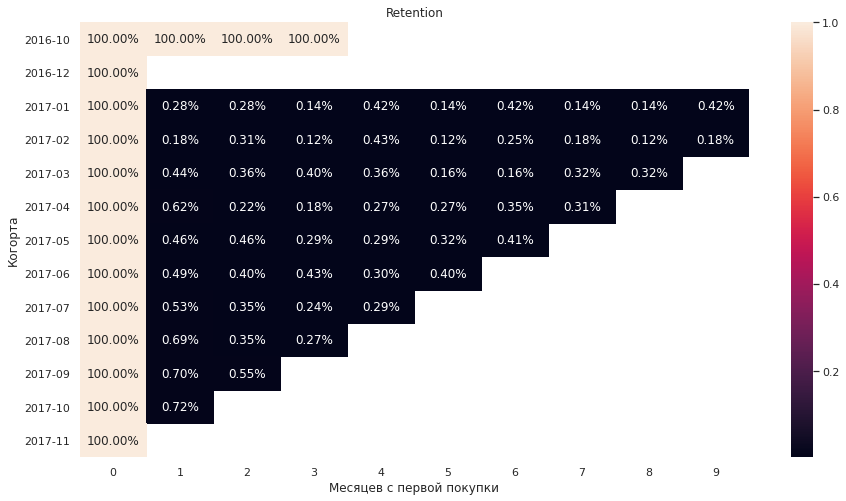

In [65]:
sns.set(style='white')

plt.figure(figsize=(15, 8))

sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.2%')
plt.title('Retention')
plt.xlabel('Месяцев с первой покупки')
plt.ylabel('Когорта')

# RFM-сегментация

In [66]:
RFM_an = df_orders.query('order_status == "delivered"')[['order_id', 'customer_id', 'order_purchase_timestamp']]
#создадим основной датафрейм для работы по RFM-сегментации
#включим в него данные о заказах, id покупателей и время покупки
RFM_an = RFM_an.merge(unique_customers, on='customer_id')
RFM_an = RFM_an.drop('customer_id', axis=1)

In [67]:
RFM_an.head(5)

,order_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6


In [68]:
RFM_an= RFM_an.merge(order_price, on='order_id')

RFM_an['order_purchase_timestamp'] = RFM_an.order_purchase_timestamp.dt.date

RFM_an = RFM_an.rename(columns=({'order_purchase_timestamp':'order_date'}))

RFM_an['order_date'] = RFM_an.order_date.astype('datetime64')

In [69]:
last_date = RFM_an['order_date'].max()
last_date #последняя дата в датафрейме

Timestamp('2018-08-29 00:00:00')

In [70]:
RFM_an

,order_id,order_date,customer_unique_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,af07308b275d755c9edb36a90c618231,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,7c142cf63193a1473d2e66489a9ae977,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,72632f0f9dd73dfee390c9b22eb56dd6,19.90
...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,da62f9e57a76d978d02ab5362c509660,174.90
110193,83c1379a015df1e13d02aae0204711ab,2017-08-27,737520a9aad80b3fbbdad19b66b37b30,205.99
110194,11c177c8e97725db2631073c19f07b62,2018-01-08,5097a5312c8b157bb7be58ae360ef43c,179.99
110195,11c177c8e97725db2631073c19f07b62,2018-01-08,5097a5312c8b157bb7be58ae360ef43c,179.99


In [71]:
rfmTable = RFM_an.groupby('customer_unique_id').agg({'order_date': lambda x: (last_date - x.max()).days, # Recency #Количество дней с последнего заказа
                                        'order_id': lambda x: len(x),      # Frequency #Количество заказов
                                        'price': lambda x: x.sum()}) # Monetary Value #Общая сумма по всем заказам

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'price': 'monetary_value'}, inplace=True)

## Для построения границ классов будем использовать метод квартилей

In [72]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])

In [73]:
quantiles

,recency,frequency,monetary_value
0.25,114.0,1.0,47.6500
0.50,218.0,1.0,89.7300
0.75,346.0,1.0,154.7375


In [74]:
rfmTable.frequency.value_counts()

1     81748
2      8797
3      1646
4       621
5       241
6       190
7        45
8        16
10       11
11       11
9        10
12        9
14        3
15        3
13        2
20        2
21        1
18        1
24        1
Name: frequency, dtype: int64

In [75]:
#выставляем границы для параметра frequency вручую, ибо данные не позволяют разделить по frequency автоматически
quantiles.loc[0.25, 'frequency'] = 1
quantiles.loc[0.50, 'frequency'] = 2 
quantiles.loc[0.75, 'frequency'] = 12

In [76]:
#созадим функции для присвоения классов для пользователей

def RClass(value,parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 3
    else:
        return 4


def FMClass(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 4
    elif value <= quantiles_table[parameter_name][0.50]:
        return 3
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1


>Recency:
* 1 - Недавно совершена последняя покупка
* 2 - Последняя покупка была совсем недавно
* 3 - Последняя покупка была некоторое время назад
* 4 - Последняя покупка была очень давно
***
> Frequency:
* 1 - Очень мало совершенных покупок
* 2 - Низкое количество совершенных покупок
* 3 - Достаточное количество совершенных покупок
* 4 - Много совершенных покупок
***
> Monetary Value:
* 1 - Принес очень мало средств бизнесу
* 2 - Принес небольшое количество средств бизнесу
* 3 - Принес значительное количество средств бизнесу
* 4 - Принес бизнесу много средств

In [77]:
rfmSegmentation = rfmTable

In [78]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles))

rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles))

rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str)+ rfmSegmentation.F_Quartile.map(str)+ rfmSegmentation.M_Quartile.map(str)

In [79]:
rfmSegmentation.head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,1,4,2,142
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,1,4,4,144
0000f46a3911fa3c0805444483337064,537,1,69.00,4,4,3,443
0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,4,4,344
0004aac84e0df4da2b147fca70cf8255,288,1,180.00,3,4,1,341


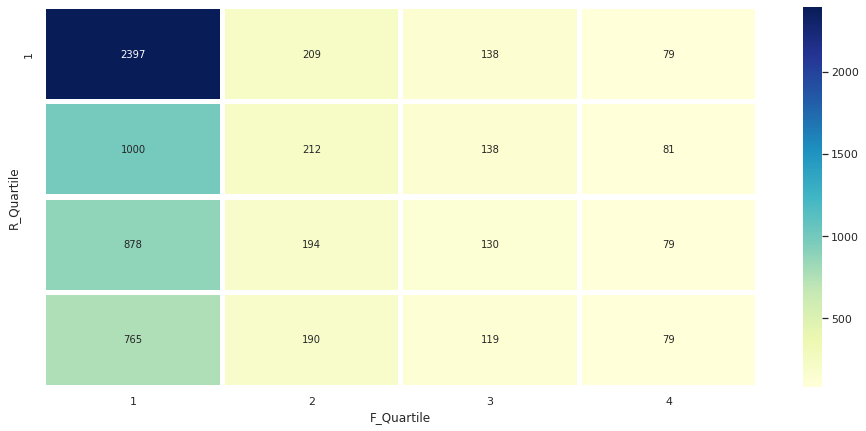

In [80]:
rfm_table = rfmSegmentation.pivot_table(
                        index='R_Quartile', 
                        columns='F_Quartile', 
                        values='monetary_value', 
                        aggfunc=np.median).applymap(int) 
sns.heatmap(rfm_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);

#  <span style="color:black">Итог исследования:</span>
***
**Итог исследования:**
- Наибольшее количество пользователей совершили только одну покупку.
- В среднем ежемесячно не доставляется 51 заказ, причины отказов могут быть различными, но выделены периоды с наибольшим количеством отказов(август и февраль 2018 года).
- Для каждого товара был определен день недели, в который его покупали чаще всего.
- Среднее количество покупок в неделю среди пользователей было определено значением 0.23 покупки в неделю, в среднем пользователь делает покупки 1 раз в месяц.
- Годовой LTV составляет 96.28
- В среднем в месяц совершают покупки 3561 уникальных пользователей.
- Процент оттока в среднем составляет 98 процентов, пользователи не остаются долгосрочными клиентами нашего магазина
- В ходе когортного анализа была выявлена когорта с самым высоким Retention на 3-й месяц в периоде с января по декабрь 2017 года, а именно когорта пользователей, у которых первая покупка датировалась июнем 2017 года.
- RFM-анализ позволил выделить наиболее ценных клиентов для бизнеса.
